<a href="https://colab.research.google.com/github/AlexeyMakovskiy/diplomHSE/blob/main/diplom_HSE(ru_2006).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

датасет  Genius Song Lyrics

Часть 1 Предобработка

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for ru-core-news-sm: filename=ru_core_news_sm-3.1.0-py3-none-any.whl size=16086391 sha256=53bc2a4e6c4103eed188d28a9c970fae1d57663452c1376d302c1dc2c3dcd9ab
  Stored in directory: /root/.cache/pip/wheels/5c/20/2c/4830d46ba72a770a01170c2a94938f4fa770ad7781340ccc4b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=

In [ ]:
# Тематическое моделирование

import spacy
import pandas as pd
import requests
from nltk.corpus import stopwords
from nltk import download
import gensim
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

download('stopwords')
df = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2000_2010(ru).csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0.1   9045 non-null   int64 
 1   Unnamed: 0     9045 non-null   int64 
 2   title          9045 non-null   object
 3   tag            8983 non-null   object
 4   artist         9045 non-null   object
 5   year           9045 non-null   int64 
 6   views          9045 non-null   int64 
 7   features       9045 non-null   object
 8   lyrics         9045 non-null   object
 9   id             9045 non-null   int64 
 10  language_cld3  9045 non-null   object
 11  language_ft    9045 non-null   object
 12  language       9045 non-null   object
dtypes: int64(5), object(8)
memory usage: 918.8+ KB


Часть 1.1 Моделирование общего корпуса

In [ ]:
# Собираем текст из слов

full_texts = []
for index, row in df.iterrows():
    if (pd.notnull(row['lyrics'])) and (row['year'] == 2006):
        full_texts.append(row['lyrics'])

In [ ]:
full_texts[1:10]

In [ ]:
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'
response = requests.get('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/ru_stopwords.txt')
stopwords_ru = response.text.splitlines()
filter = stopwords.words('russian') + list(punctuation) + stopwords_ru

In [ ]:
# Функция для предобработки, которая токенизирует, лемматизирует и делает все буквы строчными
def preprocess(input_text):
    nlp = spacy.load("ru_core_news_sm")
    tokenized_text = nlp(input_text)
    lowercase_text = [token.text.lower() for token in tokenized_text]
    # убираем пунктуацию и стоп-слова:
    output_text = [token for token in lowercase_text if token not in filter]
    clean_text = [word for word in output_text if word.isalpha()]
    return clean_text

In [ ]:
preprocessed_texts = []
for text in tqdm(full_texts):
    if isinstance(text, str):
        preprocessed_text = preprocess(text)
        preprocessed_texts.append(preprocessed_text)
    else:
        continue

  0%|          | 0/780 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
100%|██████████| 780/780 [22:57<00:00,  1.77s/it]


In [ ]:
# Сохранить предобработанный текст
import google.colab.files as gfile
with open('drive/My Drive/HSE_diploma/file.txt', 'w') as output:
    output.write(str(preprocessed_texts))

## Тут начинается непосредственно моделирование

---



In [ ]:
# Подгружаем подготовленный текст

from google.colab import drive
drive.mount('drive')
import google.colab.files as gfile

Mounted at drive


In [ ]:
with open('drive/My Drive/HSE_diploma/file.txt', 'r') as f:
    tokens = f.read()
preprocessed_texts_1 = tokens
print(preprocessed_texts_1)

[['вступление', 'отрывок', 'фильма', 'видите', 'возврошается', 'вспышка', 'прошлого', 'показать', 'начиналось', 'хочу', 'имею', 'ввиду', 'возвращаюсь', 'первоисточнику', 'иду', 'семя', 'посаженно', 'точке', 'отсчета', 'начиналось', 'делая', 'знание', 'знаете', 'предисловие', 'мс', 'приходит', 'выходит', 'оживить', 'оплодотворить', 'жить', 'униформу', 'принимая', 'форму', 'дать', 'движение', 'словам', 'рождение', 'ааайт', 'пути', 'начинает', 'идддттииии', 'стих', 'стихи', 'омофон', 'теку', 'микрофон', 'оперетой', 'самсона', 'укус', 'скарпион', 'сценарий', 'циклона', 'чилом', 'меготон', 'потоком', 'волн', 'крови', 'сценах', 'сражения', 'мегабар', 'давления', 'карбонаты', 'вадой', 'соединения', 'смеси', 'потоком', 'дунавения', 'ветров', 'движения', 'парусах', 'шествует', 'клетках', 'путешествует', 'уст', 'тэо', 'подобно', 'крео', 'выращивает', 'взращивает', 'привкусом', 'огней', 'ада', 'вкусом', 'идя', 'плод', 'чрева', 'актинойдом', 'иглой', 'шприца', 'игла', 'шприца', 'вводит', 'лицом', 

Тематическое моделирование (анализ частотностей TF-IDF)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import string
import glob
import re

In [ ]:
# Функция для предобработки, которая делает все буквы строчными и удаляет стопслова
def prep_tfidf(input_text):
    words = input_text.split()
    final = []
    for word in words:
        word = word.lower()
        if word not in filter:
            final.append(word)
    final = " ".join(final)
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)


In [ ]:
cleaned_docs = []
for text in (full_texts):
    if isinstance(text, str):
        preprocessed_text = prep_tfidf(text)
        cleaned_docs.append(preprocessed_text)
    else:
        continue

cleaned_docs[1]

'съехали макдугал середине зимы подруга тольятти, костромы дожили лета, секир-башка кокаине трем зубного порошка пришлось двигать люк свете косяка решила ехать мекку. помню, случилось, чей ветер дул рот шел следу кастанеды попал торговый флот матросы носят юбки, юнги нож рту встали погрузку улан-баторском порту сразу кинулся дацан хочу уйти ритрит навстречу лагерфельд гляжу оксфорд-стрит боцман паша, вот, держит фасон пиджак ямамото штаны де гарсон вбегает женщина картины моне кричит третьих быстро едем ко денег такси, пришлось продать пальто клянусь, такого костроме видел никто вначале весело, спустился сплин слизывали слизь ящериц спин квартире прохода языческих святынь перевел цоя урду латынь допил все, меж оконных рам сел сабвэй тируванантапурам мчимся пустыне поезд блеет скрипит везет тусклым звездам старый блюзмен-транвестит творится черте дальше, вблизи пляски сталеваров, женский бой грязи случился нерный срыв бросил ноги катманду большой барьерный риф недель брился, суток ел гр

In [ ]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (2,3),
                                stop_words = filter
                      )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

In [ ]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
#print (full_texts[0])
#print (all_keywords[0])

In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [ ]:
#разделение на кластеры
with open ("/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



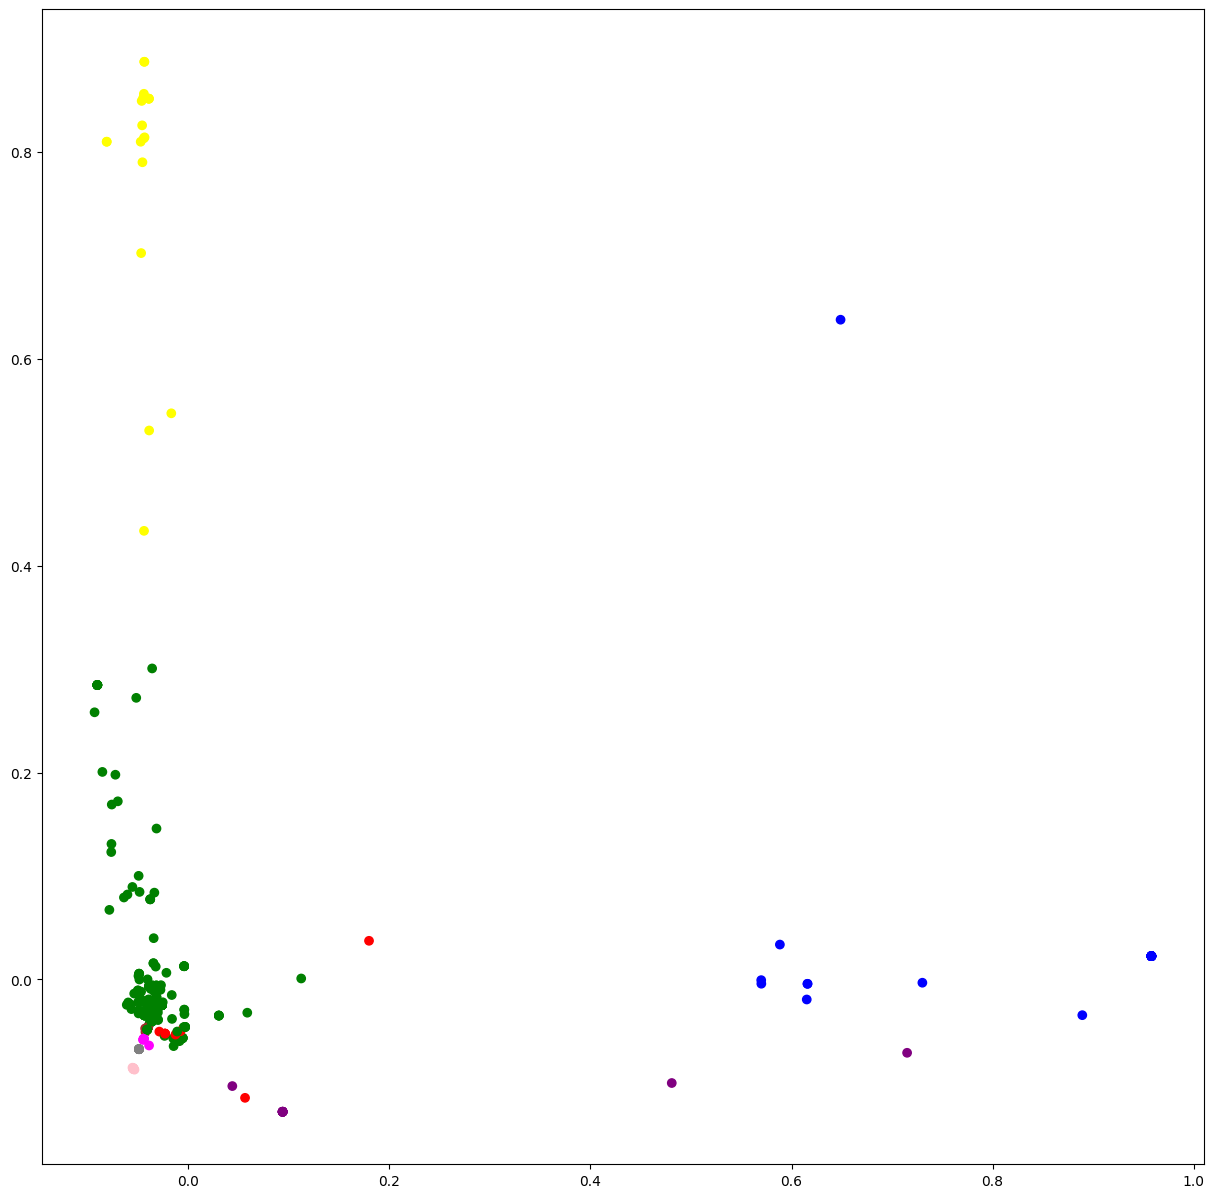

<Figure size 640x480 with 0 Axes>

In [ ]:
#Визуализация
kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = {
    0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'magenta',
    5: 'pink', 6: 'grey', 7: 'yellow', 8: 'brown', 9: 'purple'
}

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans_indices])

plt.show()
plt.savefig('trc.png')


Тематическое моделирование LDA

In [ ]:
# Создаем словарь из получившихся токенов

gensim_dictionary_for_TM = gensim.corpora.Dictionary(preprocessed_texts)
gensim_dictionary_for_TM.filter_extremes(no_above=0.1) # , no_below=20
gensim_dictionary_for_TM.compactify()
print(gensim_dictionary_for_TM)

Dictionary<2781 unique tokens: ['берегов', 'дна', 'звезду', 'луна', 'небу']...>


In [ ]:
corpus = [gensim_dictionary_for_TM.doc2bow(text) for text in preprocessed_texts]

In [ ]:
# раскладываем по "мешкам"

lda = gensim.models.LdaMulticore(corpus,
                                 num_topics = 10, # число топиков
                                 id2word=gensim_dictionary_for_TM,
                                 passes=10)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
lda.print_topics()

[(0,
  '0.070*"ла" + 0.021*"прости" + 0.012*"игра" + 0.011*"слов" + 0.011*"навсегда" + 0.010*"дни" + 0.009*"мысли" + 0.008*"новый" + 0.006*"хоп" + 0.006*"вновь"'),
 (1,
  '0.019*"давай" + 0.015*"танцуй" + 0.012*"ха" + 0.010*"go" + 0.008*"хип" + 0.006*"помню" + 0.005*"купер" + 0.005*"миллион" + 0.005*"больно" + 0.005*"волны"'),
 (2,
  '0.023*"рэп" + 0.007*"чём" + 0.007*"город" + 0.007*"русский" + 0.006*"скажи" + 0.006*"найти" + 0.005*"небе" + 0.005*"ночью" + 0.005*"тела" + 0.005*"ангелы"'),
 (3,
  '0.018*"прёт" + 0.011*"э" + 0.009*"верю" + 0.008*"дождь" + 0.007*"никто" + 0.007*"танцы" + 0.006*"смотри" + 0.005*"лети" + 0.005*"живёт" + 0.005*"город"'),
 (4,
  '0.030*"зима" + 0.018*"детка" + 0.013*"пам" + 0.012*"клубе" + 0.008*"ждёт" + 0.008*"привет" + 0.007*"твою" + 0.007*"мое" + 0.006*"ради" + 0.005*"ума"'),
 (5,
  '0.011*"оу" + 0.009*"люби" + 0.009*"ночи" + 0.009*"шило" + 0.008*"слушай" + 0.008*"быстро" + 0.006*"могу" + 0.006*"точно" + 0.006*"девчонка" + 0.006*"пить"'),
 (6,
  '0.019*"б

Визуализация LDA

In [ ]:
# Визуализация с помощью pyLDAvis
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.2 MB/s eta 0:00:00


In [ ]:
vis = gensimvis.prepare(lda, corpus, gensim_dictionary_for_TM)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.188575  0.065411       1        1  14.360019
1      0.010729 -0.059773       2        1  12.288809
0     -0.095914  0.036917       3        1  11.972498
2     -0.017609  0.010744       4        1  11.766504
3     -0.106051  0.000549       5        1  10.436310
4      0.081058  0.092267       6        1   8.844785
6     -0.109076  0.096841       7        1   8.343634
7      0.153175 -0.104419       8        1   7.820323
5     -0.033565  0.034233       9        1   7.323314
9     -0.071321 -0.172770      10        1   6.843803, topic_info=        Term        Freq       Total Category  logprob  loglift
602       ла  451.000000  451.000000  Default  30.0000  30.0000
110      рэп  389.000000  389.000000  Default  29.0000  29.0000
538     зима  151.000000  151.000000  Default  28.0000  28.0000
1071  прости  161.000000  161.000000  Default  27.0000  27.0000
2265    прёт   98.000000   98.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
543    людей   16.561415  109.199215  Topic10  -5.3921   0.7957
137      дом   14.660682   84.962422  Topic10  -5.5140   0.9248
504     свет   14.956541  101.896991  Topic10  -5.4940   0.7630
278   знаешь   15.595053  169.183378  Topic10  -5.4522   0.2978
1388     сын   13.052296   42.268984  Topic10  -5.6302   1.5067

[571 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1885      4  0.064603    a
1885      6  0.010767    a
1885      7  0.032301    a
1885      8  0.872135    a
1885     10  0.010767    a
...     ...       ...  ...
1349      5  0.658135    э
1349      6  0.034041    э
1349     10  0.011347    э
253       2  0.702894    ё
253       8  0.273348    ё

[2263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 1, 3, 4, 5, 7, 8, 6, 10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


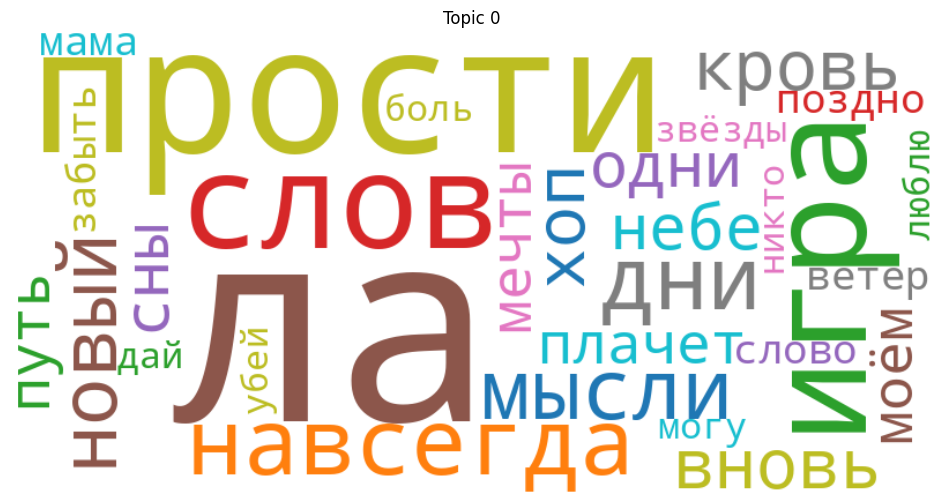

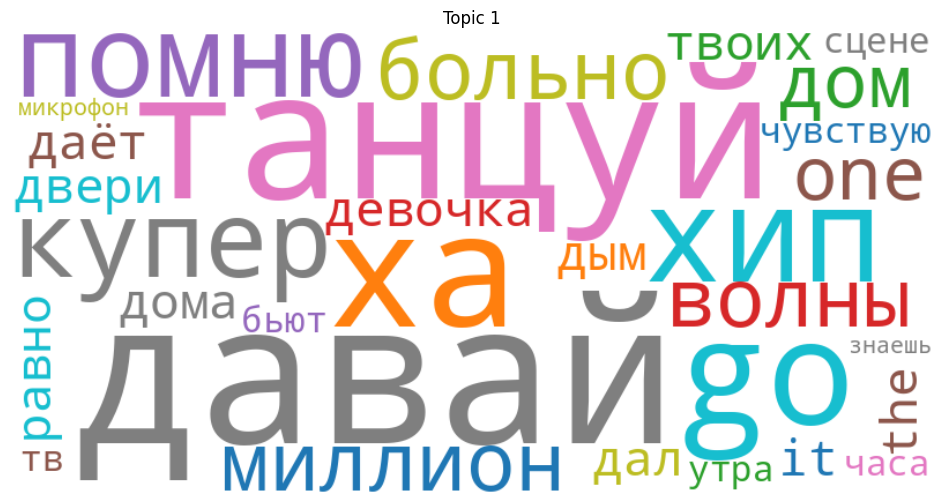

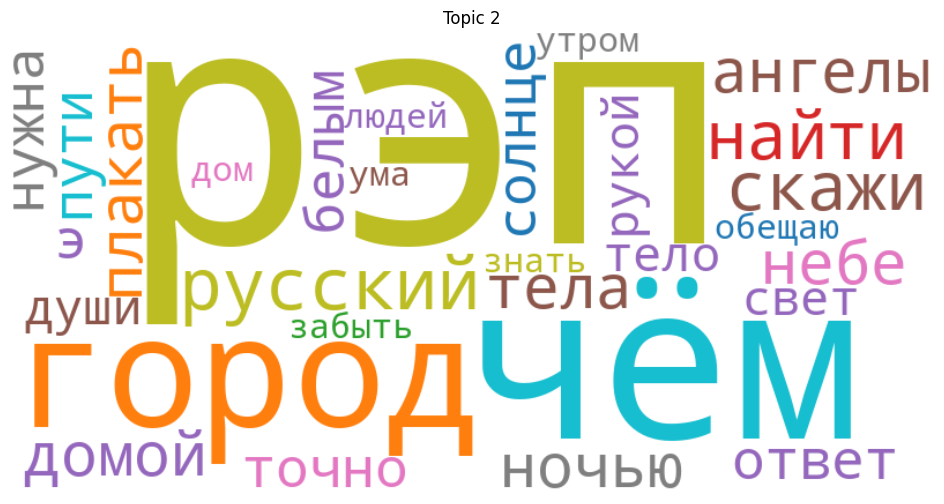

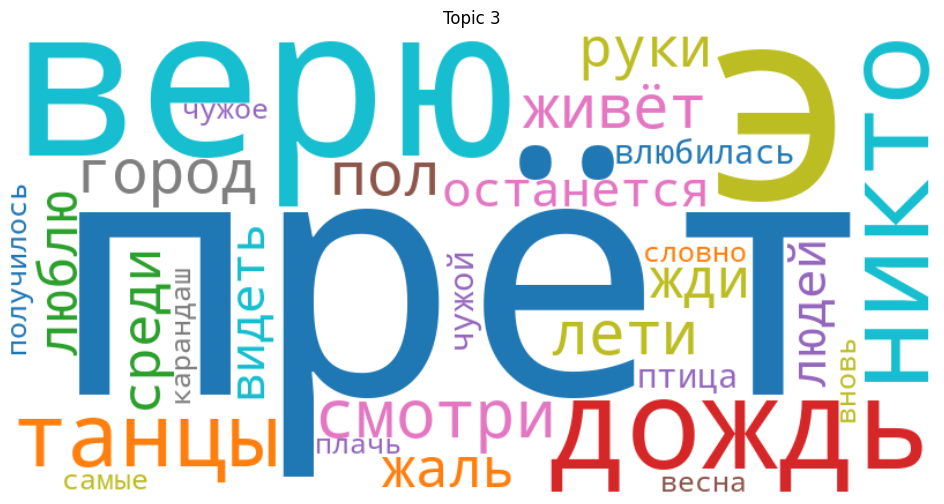

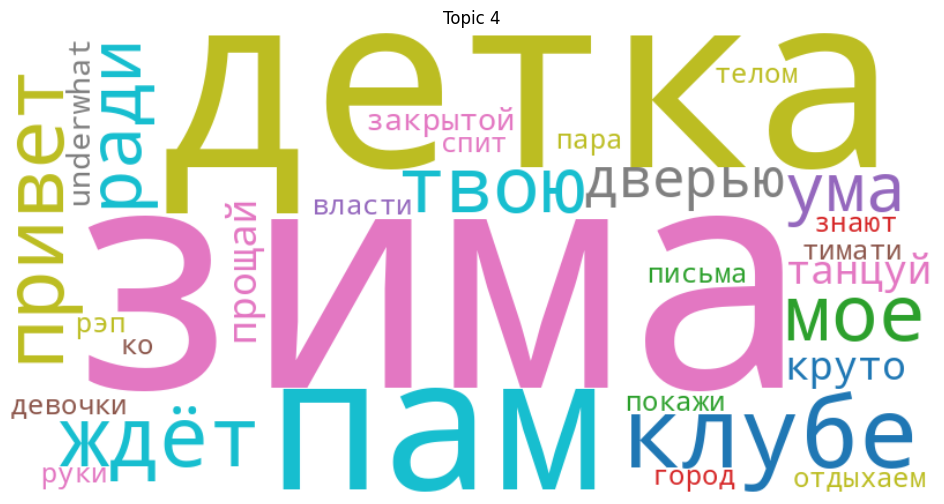

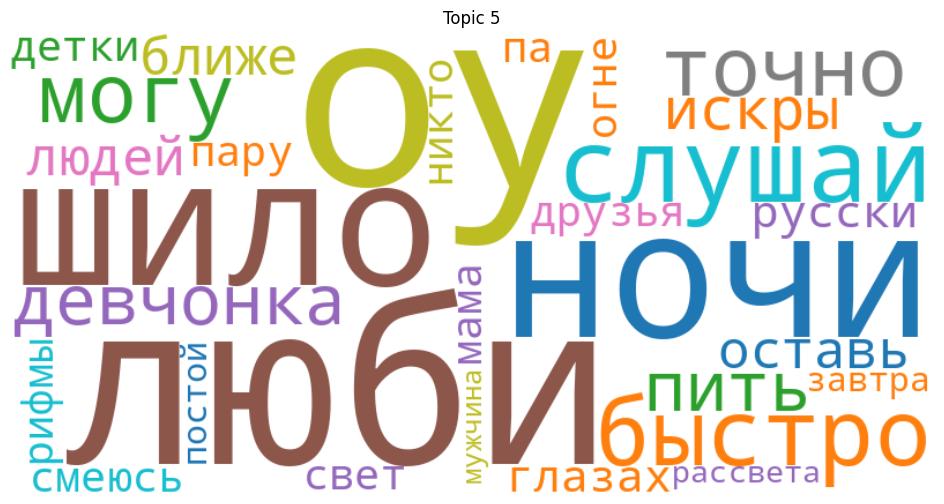

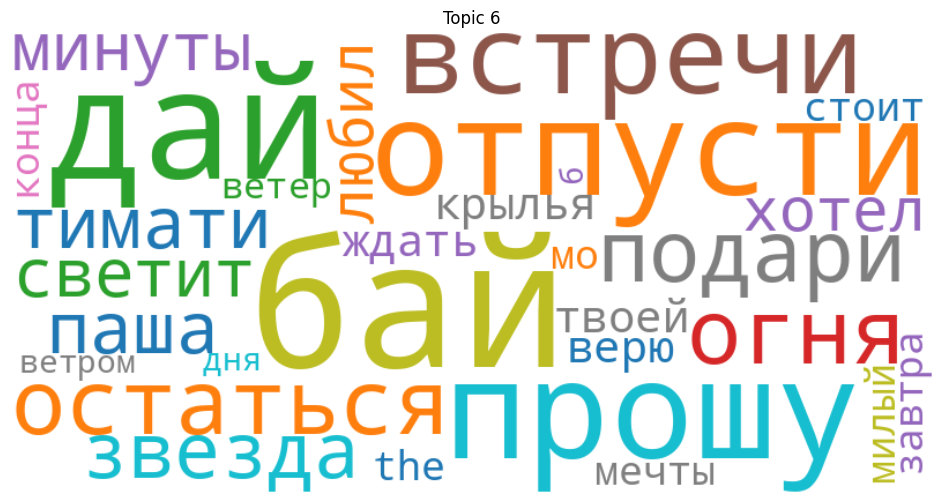

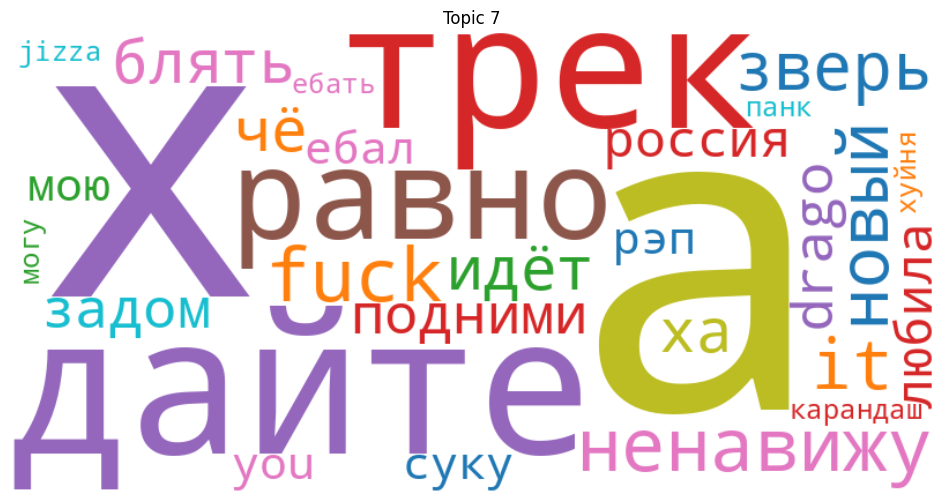

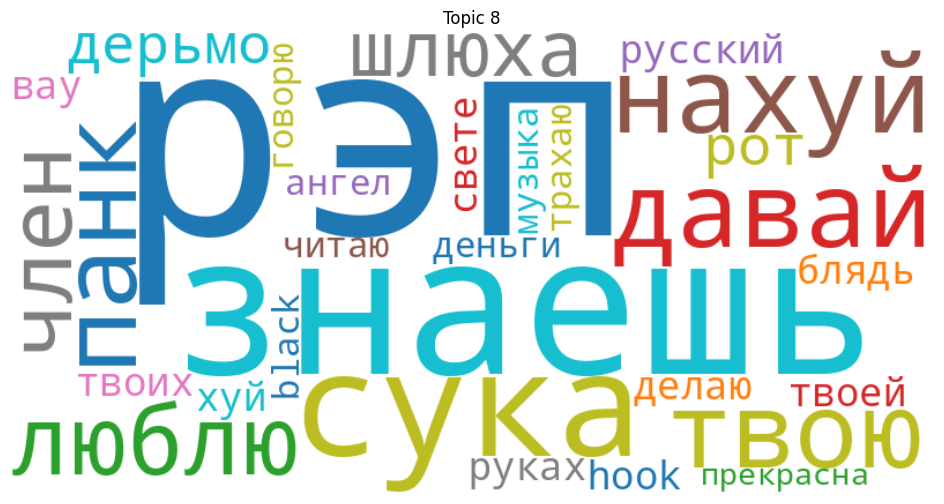

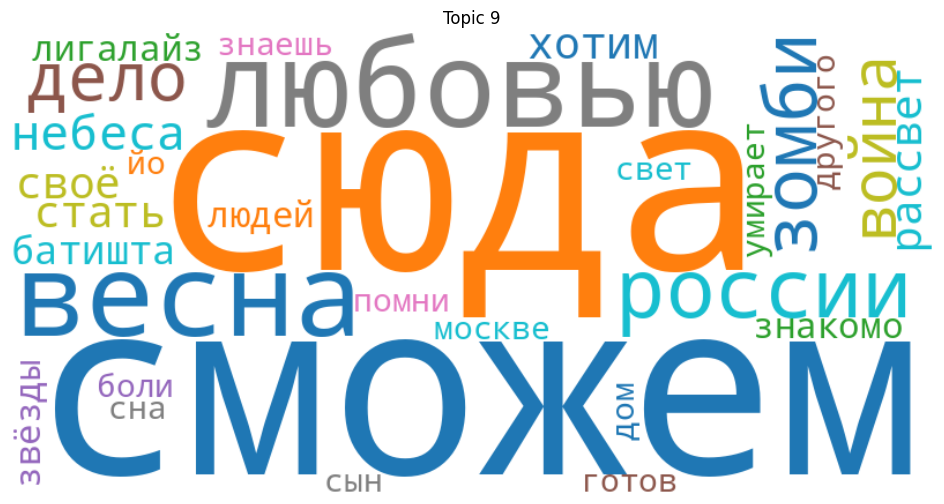

In [ ]:
# Визуализироем с помощью вордклауд

num_topics = 10

for topic in lda.show_topics(num_topics=num_topics, num_words=30, formatted=False):
    topic_num = topic[0]
    words = dict(topic[1])
    weights = {word: round(weight * 1000) for word, weight in words.items()}

    wordcloud = WordCloud(background_color="white", width=800, height=400, colormap="tab10").generate_from_frequencies(weights)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()